# Introduction to Sci-kit learn

This section demonstrates some of the most beautiful functionality of sklearn library.

In [1]:
import pandas as pd
import numpy as np

heart_disease = pd.read_csv("heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [2]:
X = heart_disease.drop('target', axis=1)
y = heart_disease.target

In [3]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=40)

clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 40,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [5]:
clf.fit(X_train, y_train);

In [6]:
y_preds = clf.predict(X_test)
y_preds

array([1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [7]:
clf.score(X_train, y_train)

1.0

In [8]:
clf.score(X_test, y_test)

0.7704918032786885

In [9]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.57      0.70        28
           1       0.72      0.94      0.82        33

    accuracy                           0.77        61
   macro avg       0.80      0.76      0.76        61
weighted avg       0.80      0.77      0.76        61



In [10]:
accuracy_score(y_test, y_preds)

0.7704918032786885

In [11]:
for i in range(10, 100, 10):
        print(f"Trying with n_estimators={i}")
        clf = RandomForestClassifier(n_estimators=i).fit(X_train, y_train)
        print(clf.score(X_test, y_test))

Trying with n_estimators=10
0.819672131147541
Trying with n_estimators=20
0.7540983606557377
Trying with n_estimators=30
0.7540983606557377
Trying with n_estimators=40
0.8360655737704918
Trying with n_estimators=50
0.7704918032786885
Trying with n_estimators=60
0.7704918032786885
Trying with n_estimators=70
0.7868852459016393
Trying with n_estimators=80
0.7868852459016393
Trying with n_estimators=90
0.7540983606557377


In [12]:
import pickle

pickle.dump(clf, open("random_forest_model_1.pkl", "wb"))

In [13]:
loaded_model = pickle.load(open("random_forest_model_1.pkl", 'rb'))
loaded_model.score(X_train, y_train)
loaded_model.score(X_test, y_test)

0.7540983606557377

In [14]:
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [15]:
X = heart_disease.drop("target", axis=1)
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [16]:
y = heart_disease.target
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [18]:
X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2
104,50,1,2,129,196,0,1,163,0,0.0,2,0,2
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
289,55,0,0,128,205,0,2,130,1,2.0,1,1,3
99,53,1,2,130,246,1,0,173,0,0.0,2,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,29,1,1,130,204,0,0,202,0,0.0,2,0,2
155,58,0,0,130,197,0,1,131,0,0.6,1,0,2
154,39,0,2,138,220,0,1,152,0,0.0,1,0,2
260,66,0,0,178,228,1,1,165,1,1.0,1,2,3


In [19]:
import matplotlib.pyplot as plt

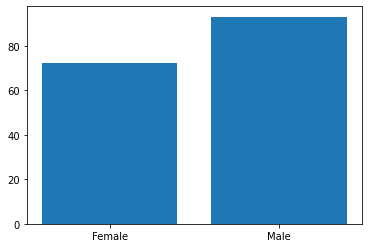

In [20]:
df = heart_disease.groupby('sex', as_index=False).agg("sum")
plt.bar(['Female', 'Male'], df.target);

In [21]:
car_sales = pd.read_csv("car-sales-extended.csv")
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043
...,...,...,...,...,...
995,Toyota,Black,35820,4,32042
996,Nissan,White,155144,3,5716
997,Nissan,Blue,66604,4,31570
998,Honda,White,215883,4,4001


In [25]:
car_sales.Doors.unique()

array([4, 5, 3], dtype=int64)

In [22]:
car_sales.Make.unique()

array(['Honda', 'BMW', 'Toyota', 'Nissan'], dtype=object)

In [24]:
4, 5, 3

(4, 5)

In [29]:
X = car_sales.drop('Price', axis=1)
y = car_sales.Price

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.head()

,Make,Colour,Odometer (KM),Doors
985,Honda,Blue,216250,4
686,Toyota,White,228619,4
280,Nissan,White,116279,4
388,Honda,White,24358,4
852,BMW,Blue,129040,5


In [31]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

In [32]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)], remainder="passthrough", )

transformed_X = transformer.fit_transform(X)

In [33]:
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [34]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [35]:
pd.get_dummies(car_sales, categorical_features)

ValueError: Length of 'prefix' (3) did not match the length of the columns being encoded (2).

In [29]:
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2)

In [30]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,112004.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35673.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,146824.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,45152.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,69954.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,218803.0
796,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,223685.0
797,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,61876.0
798,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,28625.0


In [31]:
model.fit(X_train, y_train)

RandomForestRegressor()

In [32]:
model.score(X_test, y_test)

0.3235867221569877

In [33]:
car_sales_missing = pd.read_csv("car-sales-extended-missing-data.csv")
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [34]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [35]:
car_sales_missing.dropna(subset=["Price"], inplace=True)

In [36]:
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing.Price

In [37]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

categorical_imputer = SimpleImputer(strategy="constant", fill_value="missing")
doors_imputer = SimpleImputer(strategy="constant", fill_value=4)
num_imputer = SimpleImputer(strategy="mean")

transformer = ColumnTransformer([
    ("categorical_imputer", categorical_imputer, ["Make", 'Colour']),
    ("doors_imputer", doors_imputer, ["Doors"]),
    ("num_imputer", num_imputer, ["Odometer (KM)"])
])

filled_X = transformer.fit_transform(X)
filled_X

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [38]:
X_final = pd.DataFrame(filled_X, columns=["Make", "Colour", "Doors", "Odometer (KM)"])
y_final = y

In [39]:
len(X_final) == len(y_final)

True

In [40]:
X_final.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.2)

In [42]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

transformer = ColumnTransformer([
    ("one_hot_encoding", OneHotEncoder(), ["Make", "Colour", "Doors"])
])

fX_train = transformer.fit_transform(X_train)
fX_test = transformer.fit_transform(X_test)

fY_train = y_train
fY_test = y_test

In [43]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

In [44]:
model.fit(fX_train, fY_train)

RandomForestRegressor()

In [45]:
model.score(fX_test, fY_test)

-0.032636950776071094

In [46]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [47]:
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df[housing.target_names[0]] = housing.target
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [48]:
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [49]:
X = df.drop(housing.target_names[0], axis=1)
y = df[housing.target_names[0]]

In [50]:
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [51]:
X_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
14196,3.2596,33.0,5.017657,1.006421,2300.0,3.691814,32.71,-117.03
8267,3.8125,49.0,4.473545,1.041005,1314.0,1.738095,33.77,-118.16
17445,4.1563,4.0,5.645833,0.985119,915.0,2.723214,34.66,-120.48
14265,1.9425,36.0,4.002817,1.033803,1418.0,3.994366,32.69,-117.11
2271,3.5542,43.0,6.268421,1.134211,874.0,2.300000,36.78,-119.80
...,...,...,...,...,...,...,...,...
11284,6.3700,35.0,6.129032,0.926267,658.0,3.032258,33.78,-117.96
11964,3.0500,33.0,6.868597,1.269488,1753.0,3.904232,34.02,-117.43
5390,2.9344,36.0,3.986717,1.079696,1756.0,3.332068,34.03,-118.38
860,5.7192,15.0,6.395349,1.067979,1777.0,3.178891,37.58,-121.96


In [52]:
from sklearn import linear_model
reg = linear_model.ElasticNetCV()

In [53]:
reg.fit(X_train, y_train)

ElasticNetCV()

In [54]:
reg.score(X_test, y_test)

0.5718714759772328

In [55]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100)

In [56]:
model.fit(X_train, y_train)

RandomForestRegressor()

In [57]:
model.score(X_test, y_test)

0.8071670619257274

In [58]:
heart_disease = pd.read_csv("heart-disease.csv")

In [59]:
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [60]:
X = heart_disease.drop("target", axis=1)
y = heart_disease.target

In [61]:
np.random.seed(4)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [62]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
100,42,1,3,148,244,0,0,178,0,0.8,2,2,2
39,65,0,2,160,360,0,0,151,0,0.8,2,0,2
230,47,1,2,108,243,0,1,152,0,0.0,2,0,2
185,44,1,0,112,290,0,0,153,0,0.0,2,1,2
277,57,1,1,124,261,0,1,141,0,0.3,2,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,34,1,3,118,182,0,0,174,0,0.0,2,0,2
87,46,1,1,101,197,1,1,156,0,0.0,2,0,3
197,67,1,0,125,254,1,1,163,0,0.2,1,2,3
174,60,1,0,130,206,0,0,132,1,2.4,1,2,3


In [63]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

In [64]:
clf.fit(X_train, y_train)

RandomForestClassifier()

In [65]:
clf.score(X_test, y_test)

0.8852459016393442

In [66]:
clf.predict([[40, 0, 2, 148, 244, 0, 0, 178, 0, 0.8, 2, 2, 2]])

C:\Users\Piyush\Documents\ai-project\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [67]:
clf.predict(X_test)

array([0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1], dtype=int64)

In [68]:
np.array(y_test)

array([1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1], dtype=int64)

In [69]:
np.mean(np.array([0, 1, 2, 3]) == np.array([1, 1, 2, 3]))

0.75

In [70]:
from sklearn.model_selection import cross_val_score

np.random.seed(40)
cross_val_score(clf, X, y, cv=10, scoring=None)

array([0.87096774, 0.83870968, 0.87096774, 0.93333333, 0.83333333,
       0.8       , 0.66666667, 0.8       , 0.73333333, 0.83333333])

In [71]:
y_probs = clf.predict_proba(X_test)

In [72]:
y_probs_positive = y_probs[:, 1]
y_probs_positive

array([0.46, 0.4 , 0.85, 0.99, 0.34, 0.26, 0.33, 0.93, 0.68, 0.75, 0.65,
       0.88, 0.82, 0.34, 0.72, 0.04, 0.83, 0.93, 0.36, 0.63, 0.99, 0.82,
       0.08, 0.43, 0.51, 0.05, 0.3 , 0.79, 0.94, 0.29, 0.44, 0.65, 0.92,
       0.68, 0.54, 0.95, 1.  , 0.78, 0.66, 0.08, 0.1 , 0.14, 0.14, 0.74,
       0.98, 0.6 , 0.11, 0.37, 0.2 , 0.58, 0.05, 0.55, 0.23, 0.5 , 0.95,
       0.95, 0.87, 0.76, 0.08, 0.07, 0.85])

In [73]:
from sklearn.metrics import roc_curve

In [74]:
fpr, tpr, threshold = roc_curve(y_test, y_probs_positive)

In [75]:
fpr

array([0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.04, 0.04, 0.08, 0.08, 0.12, 0.12, 0.16, 0.16, 0.28,
       0.36, 0.52, 0.52, 0.56, 0.64, 0.72, 0.84, 0.88, 0.96, 1.  ])

In [76]:
def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve for the given fpr and tpr
    """
    plt.plot(fpr, tpr, color="orange", label="ROC")
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.legend()
    plt.show()

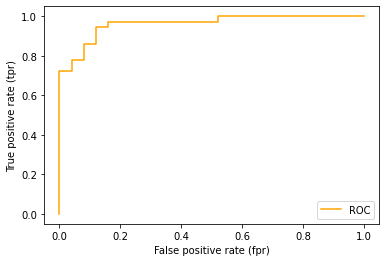

In [77]:
plot_roc_curve(fpr, tpr)

In [78]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive, )

0.9622222222222223

In [79]:
from sklearn.metrics import confusion_matrix

In [80]:
conf_matrix = confusion_matrix(y_test, y_preds)
conf_matrix

array([[ 9, 16],
       [19, 17]], dtype=int64)

In [81]:
pd.crosstab(y_test, y_preds, rownames=["Actual labels"], colnames=["Predicted labels"])

Predicted labels,0,1
Actual labels,,
0,9,16
1,19,17


In [82]:
import seaborn as sns

<AxesSubplot:>

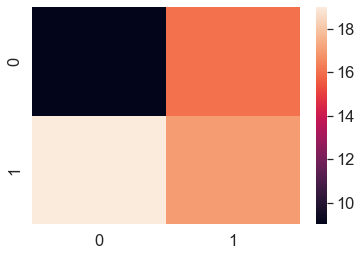

In [83]:
sns.set(font_scale=1.5)

sns.heatmap(conf_matrix)

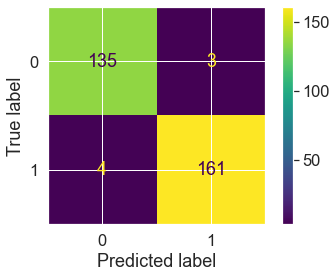

In [84]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(estimator=clf, X=X, y=y)

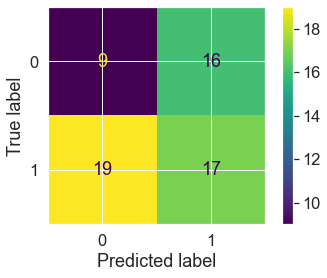

In [85]:
ConfusionMatrixDisplay.from_predictions(y_test, y_preds);